In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("NetflixStocks.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/23/2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,5/24/2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,5/28/2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,5/29/2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,5/30/2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
df.shape

(4937, 7)

In [5]:
val=pd.read_csv("Val.csv")

In [6]:
val.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2022,605.609985,609.989990,590.559998,597.369995,597.369995,3067500
1,1/4/2022,599.909973,600.409973,581.599976,591.150024,591.150024,4393100
2,1/5/2022,592.000000,592.840027,566.880005,567.520020,567.520020,4148700
3,1/6/2022,554.340027,563.359985,542.010010,553.289978,553.289978,5711800
4,1/7/2022,549.460022,553.429993,538.219971,541.059998,541.059998,3382900


In [7]:
val.shape

(351, 7)

In [8]:
tr=df.iloc[:,1:2].values

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
tr_sc=sc.fit_transform(tr)

#RNN need normalized dataset

In [10]:
import numpy as np
X_train=[]
y_train=[]
for i in range(60,df.shape[0]):  #59 step will be used to predict 60th step
  X_train.append(tr_sc[i-60:i,0])
  y_train.append(tr_sc[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [11]:
#Reshaping into 2D -> 3D type
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [13]:
model=Sequential()

#Layer 1
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.25))

#Layer 2
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.25))

#Layer 3
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.25))

#Layer 4
model.add(LSTM(units=50))
model.add(Dropout(0.25))

#Output layer
model.add(Dense(units=1))

#Compiling RNN
model.compile(optimizer='adam',loss='mean_squared_error')

#Running
model.fit(X_train,y_train,epochs=50,batch_size=64)

Epoch 1/50
77/77 [==============================] - 27s 209ms/step - loss: 0.0061
Epoch 2/50
77/77 [==============================] - 14s 185ms/step - loss: 0.0017
Epoch 3/50
77/77 [==============================] - 16s 204ms/step - loss: 0.0015
Epoch 4/50
77/77 [==============================] - 16s 210ms/step - loss: 0.0015
Epoch 5/50
77/77 [==============================] - 16s 212ms/step - loss: 0.0013
Epoch 6/50
77/77 [==============================] - 16s 213ms/step - loss: 0.0015
Epoch 7/50
77/77 [==============================] - 16s 210ms/step - loss: 0.0012
Epoch 8/50
77/77 [==============================] - 17s 219ms/step - loss: 0.0012
Epoch 9/50
77/77 [==============================] - 15s 201ms/step - loss: 0.0011
Epoch 10/50
77/77 [==============================] - 16s 211ms/step - loss: 0.0012
Epoch 11/50
77/77 [==============================] - 16s 211ms/step - loss: 9.9167e-04
Epoch 12/50
77/77 [==============================] - 17s 219ms/step - loss: 0.0010
Epoch 13/

In [14]:
val.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2022,605.609985,609.989990,590.559998,597.369995,597.369995,3067500
1,1/4/2022,599.909973,600.409973,581.599976,591.150024,591.150024,4393100
2,1/5/2022,592.000000,592.840027,566.880005,567.520020,567.520020,4148700
3,1/6/2022,554.340027,563.359985,542.010010,553.289978,553.289978,5711800
4,1/7/2022,549.460022,553.429993,538.219971,541.059998,541.059998,3382900


In [15]:
#doing smae process of train set to test set
sp=val.iloc[:,1:2].values
total=pd.concat((df['Open'],val['Open']),axis=0)
ip=total[len(total)-len(val)-60:].values
ip=ip.reshape(-1,1)
ip=sc.transform(ip)
X_test=[]
for i in range(60,val.shape[0]):
  X_test.append(ip[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pr=model.predict(X_test)
pr=sc.inverse_transform(pr)

10/10 [==============================] - 3s 32ms/step


Text(0.5, 1.0, 'NetFlix Stock Price Prediction')

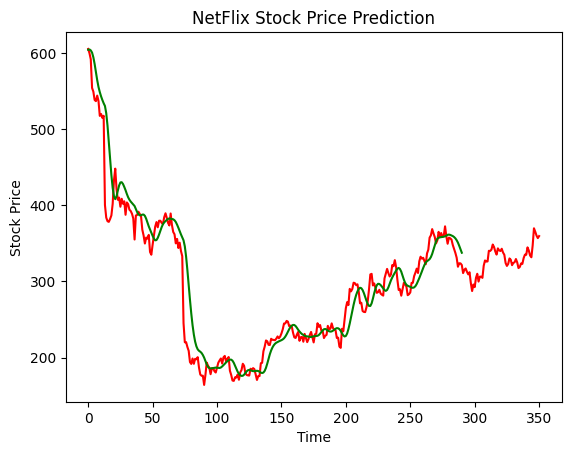

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(sp,color='red',label='Actual')
plt.plot(pr,color='green',label='Predicted')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("NetFlix Stock Price Prediction")

# Almost similar

In [17]:
pr

array([[604.4963 ],
       [604.9197 ],
       [603.67725],
       [600.78986],
       [594.6222 ],
       [585.7512 ],
       [575.18494],
       [564.49634],
       [555.543  ],
       [548.8341 ],
       [543.2411 ],
       [538.47546],
       [534.2143 ],
       [530.63763],
       [521.1195 ],
       [504.6123 ],
       [483.38455],
       [460.73126],
       [439.80148],
       [422.9216 ],
       [411.81808],
       [408.1303 ],
       [411.92606],
       [419.3628 ],
       [426.09488],
       [430.09512],
       [430.39548],
       [428.12115],
       [424.22406],
       [419.87186],
       [414.9627 ],
       [410.62875],
       [407.39728],
       [404.98978],
       [403.05927],
       [401.23587],
       [399.0983 ],
       [395.21973],
       [391.1843 ],
       [388.16385],
       [386.82852],
       [386.9505 ],
       [387.8237 ],
       [387.88718],
       [386.2075 ],
       [382.40283],
       [377.46957],
       [372.3947 ],
       [368.18045],
       [364.17075],


In [18]:
import pickle
pickle.dump(model,open('./1stmodel.sav','wb'))